# Importando bibliotecas e a base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
y = wine['target']
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# Dados de Teste e Treinamento

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Desenvolvendo o modelo (SVM)

Nesse caso usamos **Support Vector Machines** como algoritmo de classificação

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {'C':[1, 0.1, 0.01, 0.001], 'gamma':[1, 0.1, 0.01, 0.001]}

In [10]:
grid = GridSearchCV(SVC(), param_grid)

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [12]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [13]:
y_pred = grid.predict(X_test)

# Resultados (SVM)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.67      0.67      0.67        24
           2       0.47      0.47      0.47        15

    accuracy                           0.68        59
   macro avg       0.66      0.66      0.66        59
weighted avg       0.68      0.68      0.68        59



In [16]:
print(confusion_matrix(y_test,y_pred))

[[17  1  2]
 [ 2 16  6]
 [ 1  7  7]]


Nosso modelo foi capaz de classificar corretamente 68% dos vinhos

# Desenvolvendo o Modelo Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rtree = RandomForestClassifier()

In [20]:
rtree.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rtree.predict(X_test)

# Resultados (Random Forests)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [23]:
print(confusion_matrix(y_test, y_pred))

[[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]


Concluimos que o modelo consegue prever a classificação de vinhos com 100% de aproveitamento !!! 😀

# Desenvolvendo o modelo (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

# Resultados (KNN)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.67      0.67      0.67        24
           2       0.47      0.47      0.47        15

    accuracy                           0.68        59
   macro avg       0.66      0.66      0.66        59
weighted avg       0.68      0.68      0.68        59



In [36]:
error_rate = []

for i in range(1,59):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    
error_rate[:5]

[0.22033898305084745,
 0.3050847457627119,
 0.3050847457627119,
 0.3559322033898305,
 0.3220338983050847]

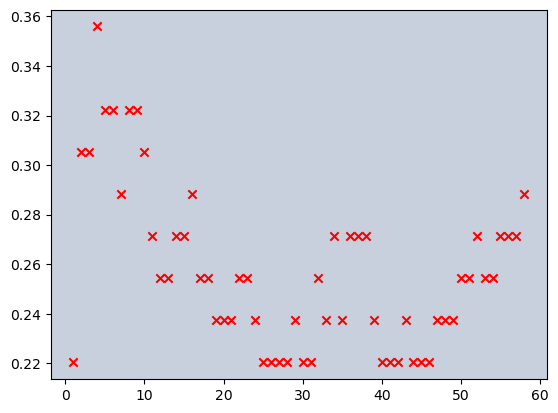

In [72]:
ax = plt.axes()
ax.set_facecolor('#c8d0de')
ax.scatter(range(1,59), error_rate, c='r', marker='x')
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.67      0.67      0.67        24
           2       0.47      0.47      0.47        15

    accuracy                           0.68        59
   macro avg       0.66      0.66      0.66        59
weighted avg       0.68      0.68      0.68        59



# Conclusão

O modelo ***Random Forests*** foi disparadamente o melhor classificando os tipos de vinho